In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, or_

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/87/qvvcb7_s1jddn7tjwc25qz1m0000gn/T/ipykernel_97586/2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

[]


In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

AttributeError: measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent_date = (
    session.query(Measurements.date)
    .order_by(Measurements.date)
    # .order_by(Measurements.date.desc())
    .limit(1)
)
most_recent_date

NameError: name 'Measurements' is not defined

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
previous_date = most_recent_date - dt.timedelta(days=365)
# previous_date
# Perform a query to retrieve the data and precipitation scores
prcp_data = (
    session.query(Measurements.date, func.sum(Measurements.prcp))
    .filter(and_(Measurements.date >= previous_date,
            Measurements.date <= most_recent_date))
    .group_by(Measurements.date)
    .order_by(Measurements.date)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = (
    pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
    .sort_values(by='date')  # Sort the dataframe by date
    .set_index('date', inplace=True)
)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 8))
prcp_df.plot(y='precipitation', x='date', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.show()

NameError: name 'most_recent_date' is not defined

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

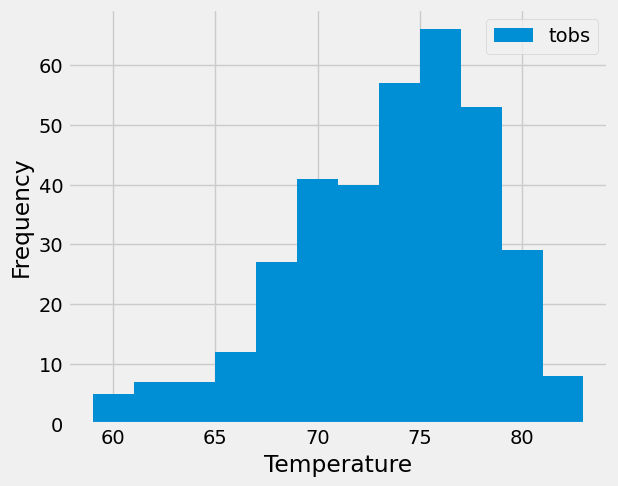

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()